In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('/content/Heart.csv')

In [2]:
from sklearn.model_selection import train_test_split

# Splitting data into train+validation and test sets
train_val_df, test_df = train_test_split(df, test_size=0.30, random_state=42)

# Split the train+validation set into further train and validation sets
train_df, val_df = train_test_split(train_val_df, test_size=0.20, random_state=42) # This will be 20% of the original dataset


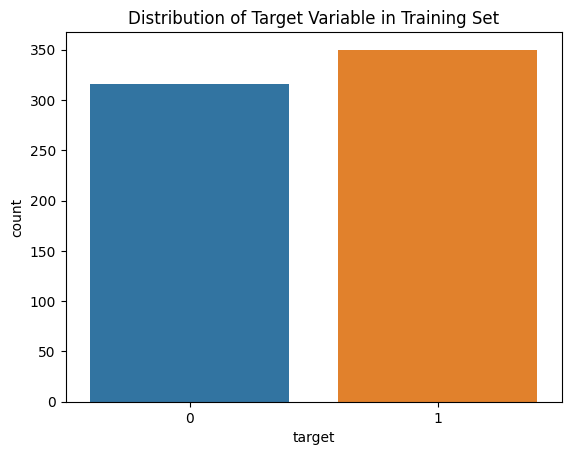

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of the target variable in the training set
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Variable in Training Set')
plt.show()


In [4]:
# Imputing missing values with the median
train_df.fillna(train_df.median(), inplace=True)
val_df.fillna(train_df.median(), inplace=True)
test_df.fillna(train_df.median(), inplace=True)

In [5]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df.drop('target', axis=1))
val_df_scaled = scaler.transform(val_df.drop('target', axis=1))
test_df_scaled = scaler.transform(test_df.drop('target', axis=1))

**Logistic Regression**

In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_df_scaled, train_df['target'])


LogisticRegression()

**K-Nearest Neighbor (KNN)**

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  #We can tune this parameter
knn.fit(train_df_scaled, train_df['target'])

KNeighborsClassifier(n_neighbors=3)

**XGBoost (Gradient Boost)**

In [8]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(train_df_scaled, train_df['target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Artificial Neural Networks (ANN)**

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=train_df_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_df_scaled, train_df['target'], epochs=150, batch_size=10, verbose=0)

**Decision Trees**

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(train_df_scaled, train_df['target'])

DecisionTreeClassifier()

**Naive Bayes**

In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_df_scaled, train_df['target'])

GaussianNB()

**Support Vector Machine (SVM)**

In [12]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_df_scaled, train_df['target'])

SVC()

**Random Forest Classifier**

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training set
random_forest.fit(train_df_scaled, train_df['target'])


RandomForestClassifier(random_state=42)

**This was for training the dataset on the chosen models, next we will test the validation sets before doing the final testing.**

--------------------------------------------------

In [14]:
from sklearn.metrics import classification_report

**Logistic Regression Evaluation:**

In [15]:
val_predictions_logreg = logreg.predict(val_df_scaled)
print("Logistic Regression - Classification Report on Validation Set")
print(classification_report(val_df['target'], val_predictions_logreg))


Logistic Regression - Classification Report on Validation Set
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        91
           1       0.79      0.87      0.82        76

    accuracy                           0.83       167
   macro avg       0.83      0.84      0.83       167
weighted avg       0.84      0.83      0.83       167



**K-Nearest Neighbor (KNN) Evaluation:**

In [16]:
val_predictions_knn = knn.predict(val_df_scaled)
print("K-Nearest Neighbors - Classification Report on Validation Set")
print(classification_report(val_df['target'], val_predictions_knn))

K-Nearest Neighbors - Classification Report on Validation Set
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        91
           1       0.75      0.89      0.81        76

    accuracy                           0.81       167
   macro avg       0.82      0.82      0.81       167
weighted avg       0.83      0.81      0.81       167



**XGBoost Evaluation:**

In [17]:
val_predictions_xgb = xgb.predict(val_df_scaled)
print("XGBoost - Classification Report on Validation Set")
print(classification_report(val_df['target'], val_predictions_xgb))

XGBoost - Classification Report on Validation Set
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        91
           1       0.86      0.91      0.88        76

    accuracy                           0.89       167
   macro avg       0.89      0.89      0.89       167
weighted avg       0.89      0.89      0.89       167



**ANN Evaluation:**

In [18]:
val_predictions_ann = (model.predict(val_df_scaled) > 0.5).astype("int32")
print("Artificial Neural Network - Classification Report on Validation Set")
print(classification_report(val_df['target'], val_predictions_ann))

6/6 [==============================] - 0s 2ms/step
Artificial Neural Network - Classification Report on Validation Set
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        91
           1       0.84      0.92      0.88        76

    accuracy                           0.89       167
   macro avg       0.89      0.89      0.89       167
weighted avg       0.89      0.89      0.89       167



**Decision Trees Evaluation:**

In [19]:
val_predictions_dtree = dtree.predict(val_df_scaled)
print("Decision Trees - Classification Report on Validation Set")
print(classification_report(val_df['target'], val_predictions_dtree))

Decision Trees - Classification Report on Validation Set
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        91
           1       0.79      0.79      0.79        76

    accuracy                           0.81       167
   macro avg       0.81      0.81      0.81       167
weighted avg       0.81      0.81      0.81       167



**Naive Bayes Evaluaiton:**

In [20]:
val_predictions_nb = nb.predict(val_df_scaled)
print("Naive Bayes - Classification Report on Validation Set")
print(classification_report(val_df['target'], val_predictions_nb))

Naive Bayes - Classification Report on Validation Set
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        91
           1       0.80      0.84      0.82        76

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.83      0.83      0.83       167



**SVM Evaluation:**

In [21]:
val_predictions_svm = svm.predict(val_df_scaled)
print("Support Vector Machine - Classification Report on Validation Set")
print(classification_report(val_df['target'], val_predictions_svm))

Support Vector Machine - Classification Report on Validation Set
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        91
           1       0.82      0.92      0.87        76

    accuracy                           0.87       167
   macro avg       0.88      0.88      0.87       167
weighted avg       0.88      0.87      0.87       167



**Rando Forest Evaluation:**

In [22]:
val_predictions_rf = random_forest.predict(val_df_scaled)
print("Random Forest - Classification Report on Validation Set")
print(classification_report(val_df['target'], val_predictions_rf))

Random Forest - Classification Report on Validation Set
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        91
           1       0.88      0.93      0.90        76

    accuracy                           0.91       167
   macro avg       0.91      0.91      0.91       167
weighted avg       0.91      0.91      0.91       167



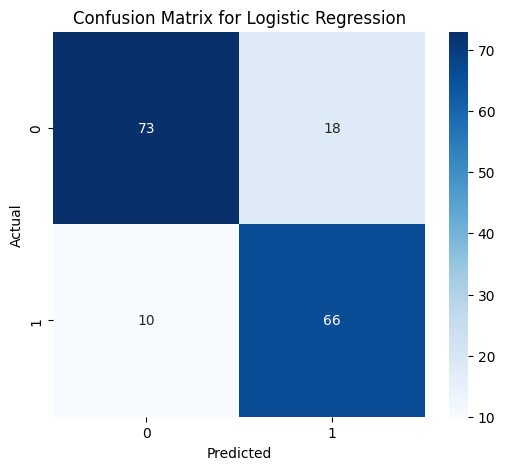

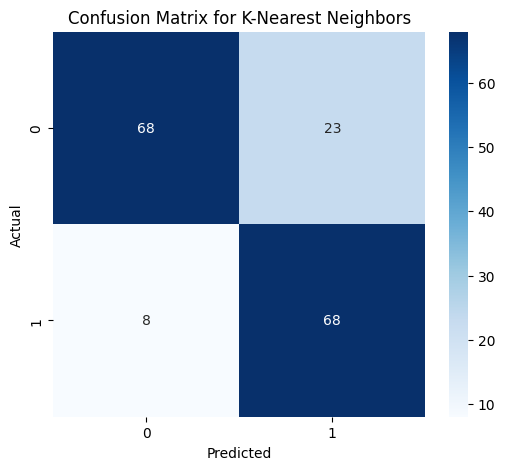

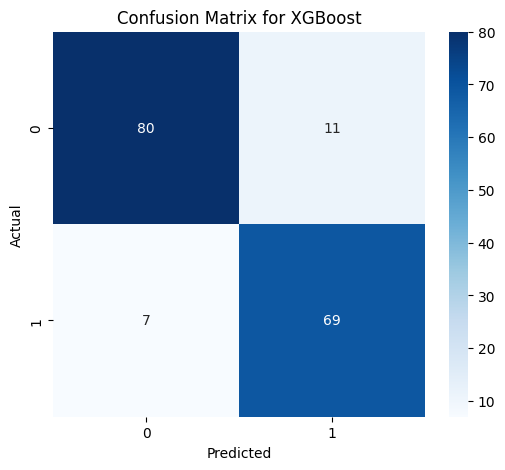

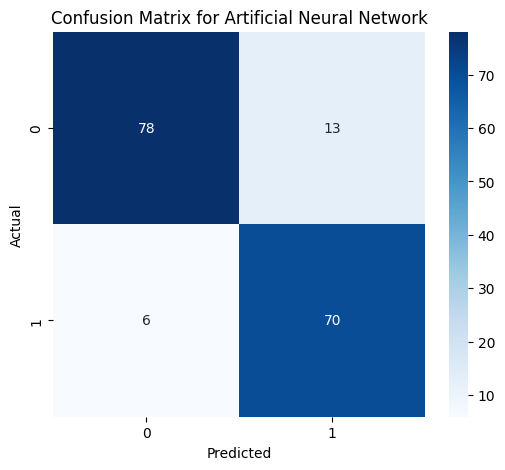

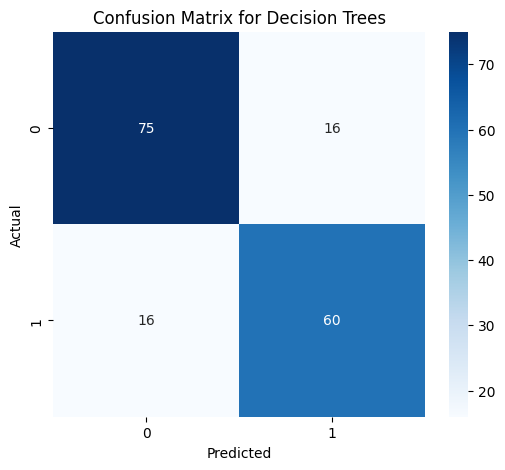

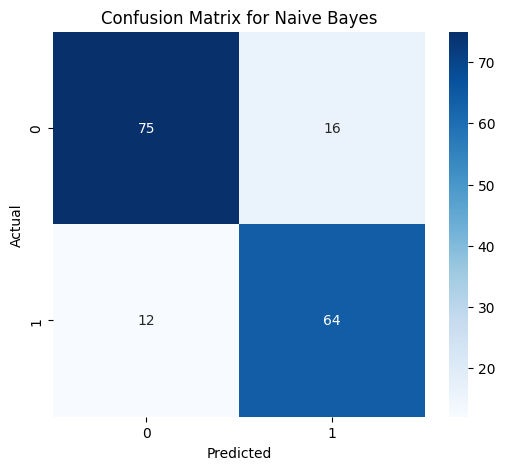

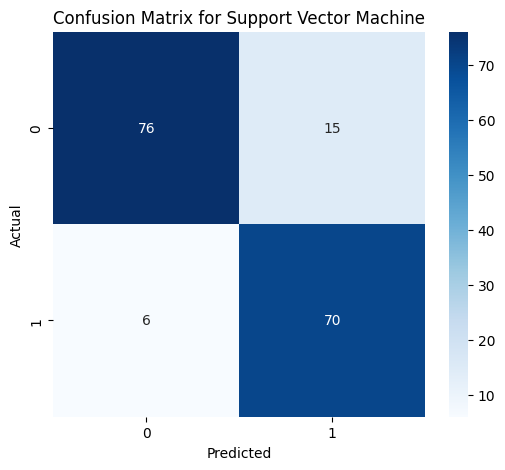

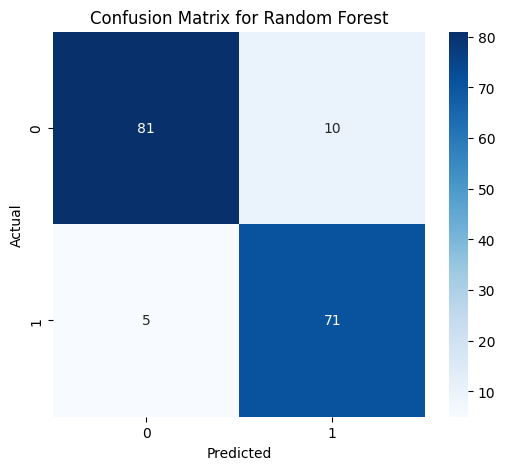

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Create a dictionary of model predictions
model_predictions = {
    "Logistic Regression": val_predictions_logreg,
    "K-Nearest Neighbors": val_predictions_knn,
    "XGBoost": val_predictions_xgb,
    "Artificial Neural Network": val_predictions_ann,
    "Decision Trees": val_predictions_dtree,
    "Naive Bayes": val_predictions_nb,
    "Support Vector Machine": val_predictions_svm,
    "Random Forest": val_predictions_rf
}

# Plotting all confusion matrices
for model_name, model_pred in model_predictions.items():
    cm = confusion_matrix(val_df['target'], model_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


# **Now moving onto the testing of the remaining data set split of 30%**

**Random Forest:**

In [25]:
test_predictions_rf = random_forest.predict(test_df_scaled)
print("Random Forest - Classification Report on Test Set")
print(classification_report(test_df['target'], test_predictions_rf))

Random Forest - Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       154
           1       0.91      0.94      0.92       203

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357



**ANN:**

In [26]:
test_predictions_ann = (model.predict(test_df_scaled) > 0.5).astype("int32")
print("Artificial Neural Network - Classification Report on Test Set")
print(classification_report(test_df['target'], test_predictions_ann))

12/12 [==============================] - 0s 2ms/step
Artificial Neural Network - Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       154
           1       0.89      0.88      0.88       203

    accuracy                           0.87       357
   macro avg       0.87      0.87      0.87       357
weighted avg       0.87      0.87      0.87       357



**SVM:**

In [27]:
test_predictions_svm = svm.predict(test_df_scaled)
print("Support Vector Machine - Classification Report on Test Set")
print(classification_report(test_df['target'], test_predictions_svm))


Support Vector Machine - Classification Report on Test Set
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       154
           1       0.89      0.93      0.91       203

    accuracy                           0.89       357
   macro avg       0.89      0.89      0.89       357
weighted avg       0.89      0.89      0.89       357



In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
import pandas as pd

# Flatten the prediction arrays if they are not 1-dimensional
predictions_flattened = [pred.flatten() if pred.ndim > 1 else pred for pred in [test_predictions_ann, test_predictions_svm, test_predictions_rf]]

models = ['ANN', 'SVM', 'RF']
predicted_counts = {model: pd.Series(pred).value_counts() for model, pred in zip(models, predictions_flattened)}


actual_counts = test_df['target'].value_counts()

# Combine actual and predicted counts into one DataFrame
class_counts_df = pd.DataFrame({'Actual': actual_counts}).sort_index()
for model, counts in predicted_counts.items():
    class_counts_df[model] = counts

print(class_counts_df)

   Actual  ANN  SVM   RF
0     154  155  146  149
1     203  202  211  208


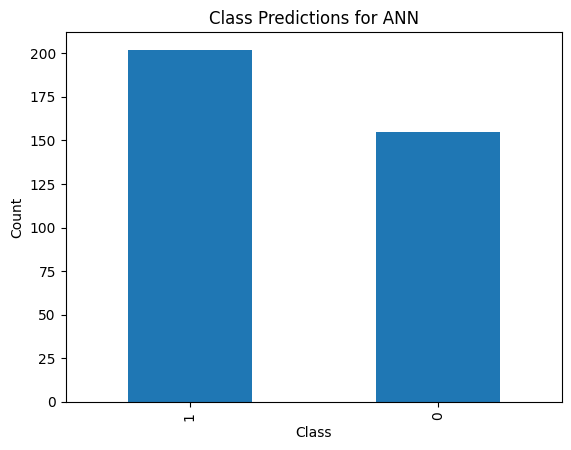

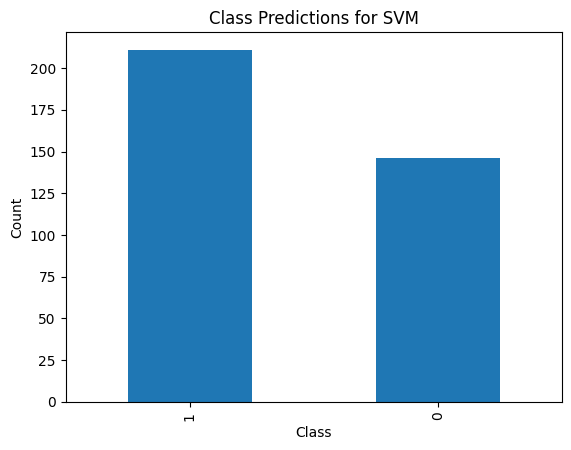

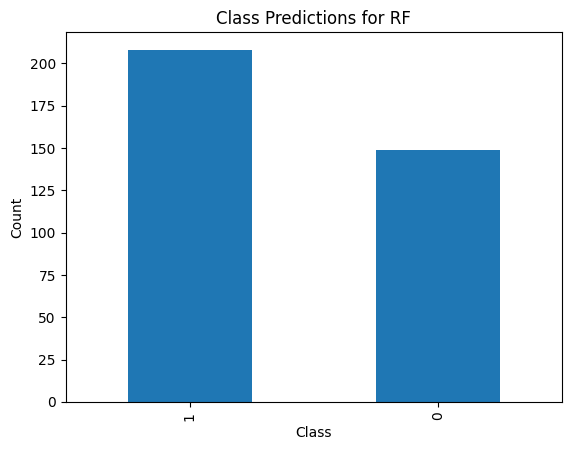

In [42]:
import matplotlib.pyplot as plt

for model in models:
    plt.figure()
    class_counts_df[model].plot(kind='bar')
    plt.title(f'Class Predictions for {model}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

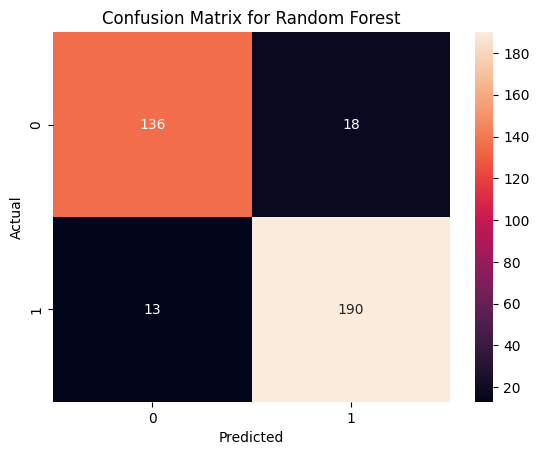

In [43]:
cm = confusion_matrix(test_df['target'], test_predictions_rf)
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

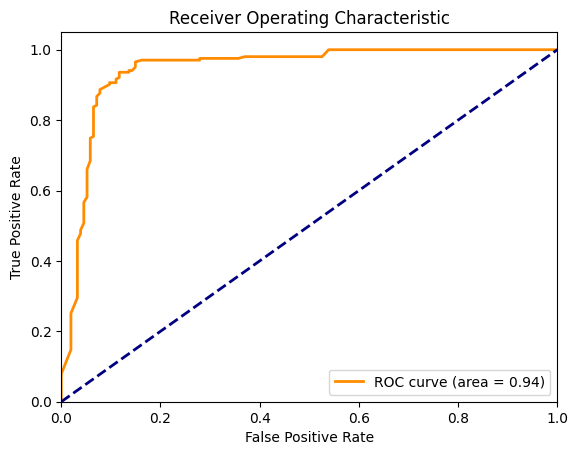

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_df['target'], random_forest.predict_proba(test_df_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

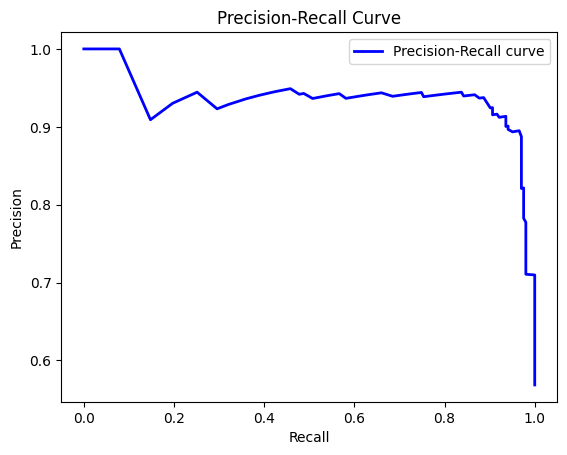

In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_df['target'], random_forest.predict_proba(test_df_scaled)[:, 1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

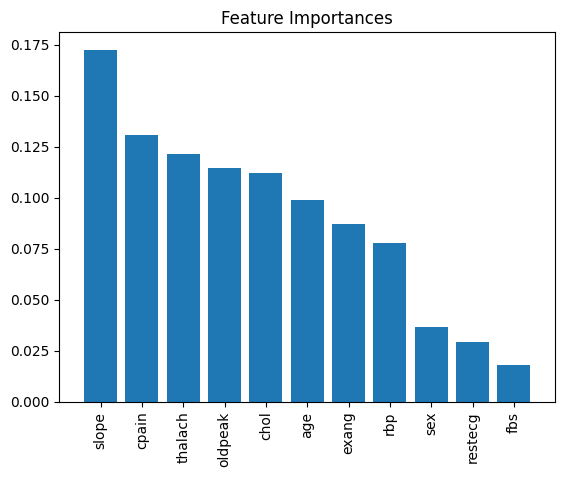

In [32]:
import numpy as np
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title('Feature Importances')
plt.bar(range(test_df_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(test_df_scaled.shape[1]), test_df.columns[indices], rotation=90)
plt.xlim([-1, test_df_scaled.shape[1]])
plt.show()

In [35]:
history = model.fit(train_df_scaled, train_df['target'], validation_data=(val_df_scaled, val_df['target']), epochs=150, batch_size=10, verbose=1)

Epoch 1/150
67/67 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 0.9790 - val_loss: 0.4850 - val_accuracy: 0.8743
Epoch 2/150
67/67 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9745 - val_loss: 0.4821 - val_accuracy: 0.8683
Epoch 3/150
67/67 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.9775 - val_loss: 0.4843 - val_accuracy: 0.8743
Epoch 4/150
67/67 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9760 - val_loss: 0.4878 - val_accuracy: 0.8802
Epoch 5/150
67/67 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9790 - val_loss: 0.4906 - val_accuracy: 0.8623
Epoch 6/150
67/67 [==============================] - 0s 5ms/step - loss: 0.0795 - accuracy: 0.9790 - val_loss: 0.4901 - val_accuracy: 0.8743
Epoch 7/150
67/67 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.9760 - val_loss: 0.4875 - val_accuracy: 0.8802
Epoch 8/150
6

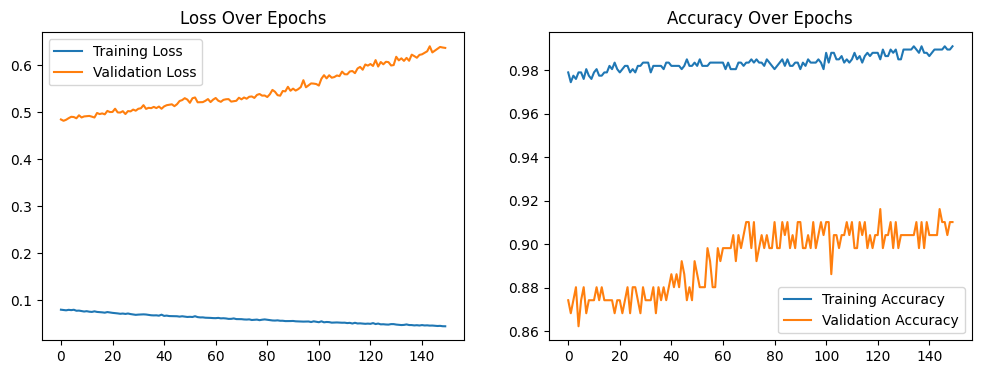

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [2]:
# Convert the notebook to HTML
!jupyter nbconvert --to html 'EE491_Project_Heart_Disease_Predicter.ipynb'

[NbConvertApp] Converting notebook EE491_Project_Heart_Disease_Predicter.ipynb to html
[NbConvertApp] Writing 1098282 bytes to EE491_Project_Heart_Disease_Predicter.html
